In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Question 1 (Intensity transformation)

#

In [2]:
# creating transformation points
pts = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, pts[0, 1], pts[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(pts[0, 1] + 1, pts[1, 1], pts[1, 0] - pts[0, 0]).astype(np.uint8)
t3 = np.linspace(pts[1, 1] + 1, pts[2, 1], pts[2, 0] - pts[1, 0]).astype(np.uint8)
t4 = np.linspace(pts[2, 1] + 1, pts[3, 1], pts[3, 0] - pts[2, 0]).astype(np.uint8)
t5 = np.linspace(pts[3, 1] + 1, 255, 255 - pts[3, 0]).astype(np.uint8)

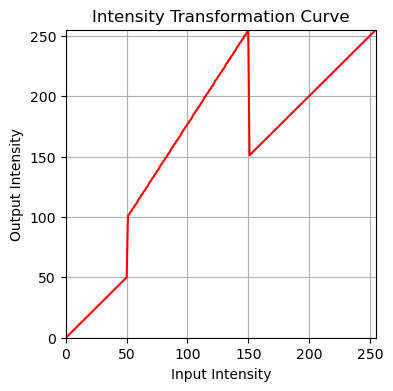

In [3]:
# Creating transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(x, transform, color='red')
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()

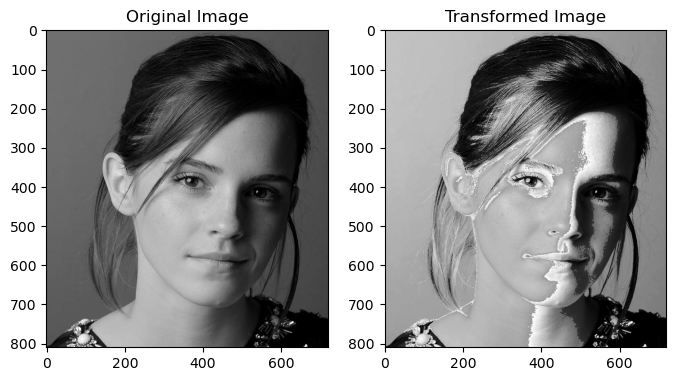

In [4]:
# Transform the image
img_1 = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
plt.show()

## Question 2

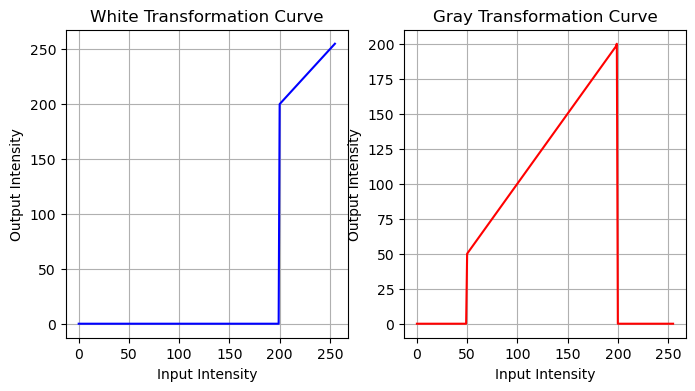

In [5]:
# Creating transformations

white_t = np.linspace(200, 255, 56).astype(np.uint8)
white_t = np.concatenate((np.zeros(200, dtype=np.uint8), white_t), axis=0).astype(np.uint8)

gray_t = np.linspace(50, 200, 150).astype(np.uint8)
gray_t = np.concatenate((np.zeros(50, dtype=np.uint8),gray_t, np.zeros(56, dtype=np.uint8)), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting white and grey transformations curves
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, white_t, color='blue')
ax[0].set_title("White Transformation Curve")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].grid(True)

ax[1].plot(x, gray_t, color='red')
ax[1].set_title("Gray Transformation Curve")
ax[1].set_xlabel("Input Intensity")
ax[1].set_ylabel("Output Intensity")
ax[1].grid(True)

plt.show()


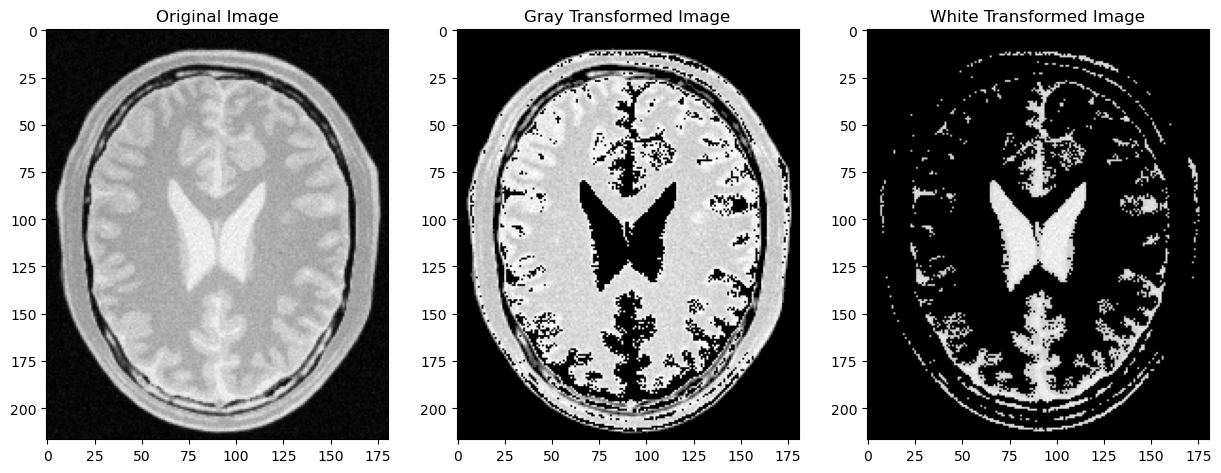

In [6]:
img2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

gray_transformed = cv.LUT(img2, gray_t)
white_transformed = cv.LUT(img2, white_t)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gray_transformed, cmap='gray')
ax[1].set_title('Gray Transformed Image')
ax[2].imshow(white_transformed, cmap='gray')
ax[2].set_title('White Transformed Image')
plt.show()

## Question 03

In [7]:
# Gamma correction in L - channel

gamma = 0.7
img3 = cv.imread("a1images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)

L, a, b = cv.split(cv.cvtColor(img3, cv.COLOR_BGR2LAB))

gamma_t = np.array([(j / 255.0)**gamma * 255 for j in range(256)]).astype(np.uint8)
L_corrected = cv.LUT(L, gamma_t)

merged = cv.merge((L_corrected, a, b))
img3_modified = cv.cvtColor(merged, cv.COLOR_LAB2BGR)

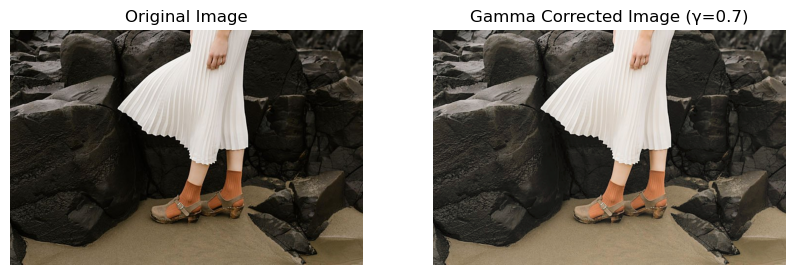

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img3_modified, cv.COLOR_BGR2RGB))
ax[1].set_title(f"Gamma Corrected Image (γ={gamma})")
ax[1].axis("off")

plt.show()

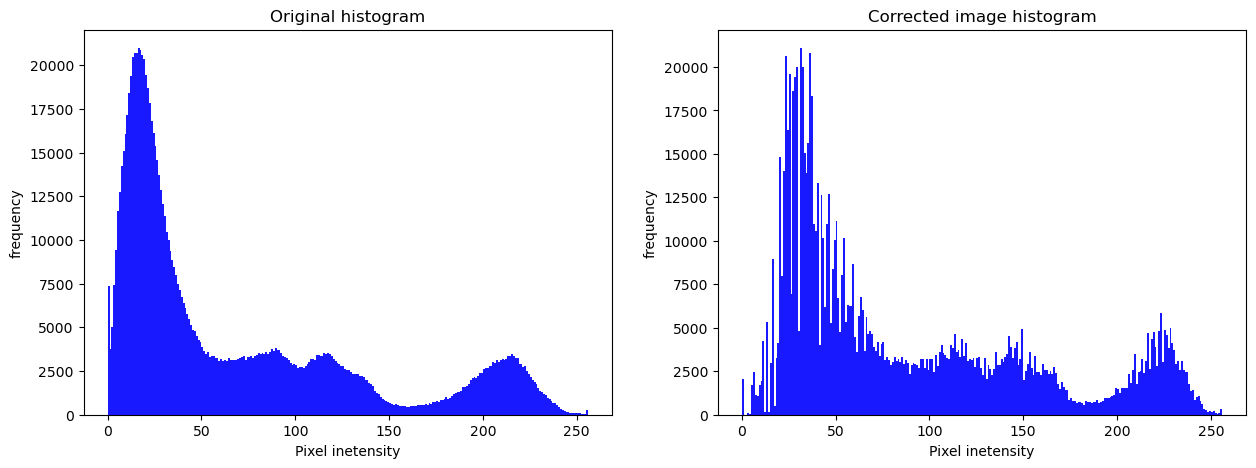

In [21]:
# Plotting histograms

img3_hist = img3.ravel()
img3_modified_hist = img3_modified.ravel()

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].hist(img3_hist, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[0].set_title("Original histogram")
ax[0].set_xlabel('Pixel inetensity')
ax[0].set_ylabel('frequency')

ax[1].hist(img3_modified_hist, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[1].set_title("Corrected image histogram")
ax[1].set_xlabel('Pixel inetensity')
ax[1].set_ylabel('frequency')

plt.show()

## Question 4

In [10]:
# Vibrance Transformation function

a = 0.5    # Assume
sigma = 70 # Given
vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

    

### part (a)

In [11]:
img4 = cv.imread("a1images/spider.png", cv.IMREAD_COLOR_BGR)

In [12]:
img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
h, s, v = cv.split(cv.cvtColor(img4, cv.COLOR_BGR2HSV))

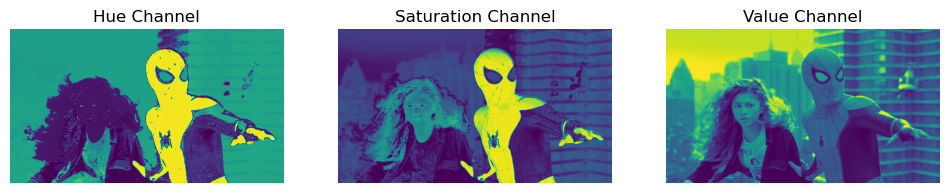

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(h)
ax[0].set_title("Hue Channel")
ax[0].axis("off")
ax[1].imshow(s)
ax[1].set_title("Saturation Channel")
ax[1].axis("off")
ax[2].imshow(v)
ax[2].set_title("Value Channel")
ax[2].axis("off")

plt.show()

### part (b)

In [14]:
sat_trans = cv.LUT(s, vib_t)

### part (c)

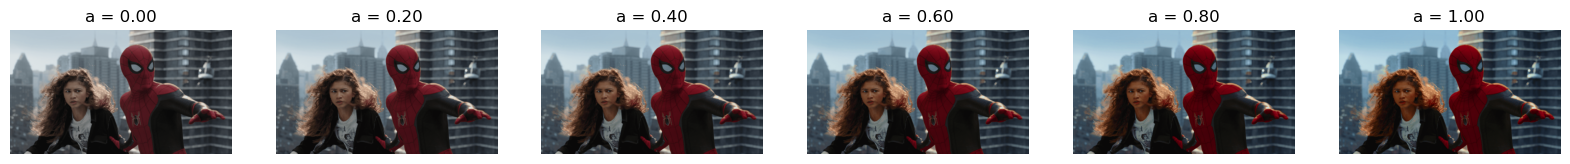

In [16]:
a_values = np.linspace(0, 1, 6)
fig, ax = plt.subplots(1, len(a_values),figsize=(20, 20))

for i, a in enumerate(a_values):
    vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)
    sat_trans = cv.LUT(s, vib_t)
    img = cv.merge([h, sat_trans, v])
    img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
    ax[i].imshow(img)
    ax[i].set_title(f'a = {a:.2f}')
    ax[i].axis('off')
plt.show()


### part (d)

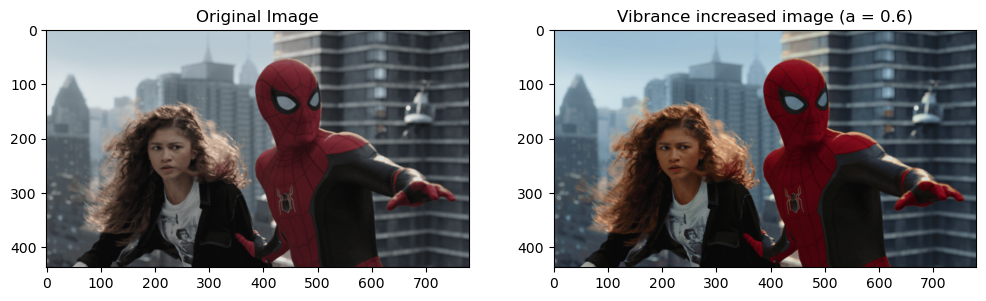

In [17]:
# suitable a value = 0.6
vib_t_final = np.array([min((x + (0.6 * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

sat_trans_final = cv.LUT(s, vib_t_final)
img_final = cv.merge([h, sat_trans_final, v])
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img4_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(img_final)
ax[1].set_title("Vibrance increased image (a = 0.6)")

plt.show()

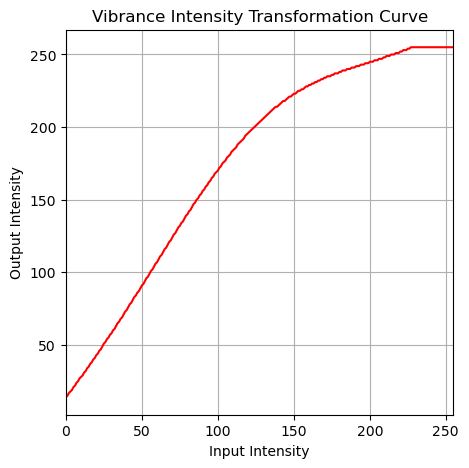

In [18]:
x = np.arange(256)

fig = plt.figure(figsize=(5, 5))
plt.plot(x, vib_t_final, color='red')
plt.title("Vibrance Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

## Question 5

In [19]:
img5 = cv.imread("a1images/shells.tif", cv.IMREAD_GRAYSCALE)

print(np.dtype(img5[0][0]), img5.shape)

uint8 (500, 500)


In [25]:
def hist_eq(img):
    # define constants
    L = 2 ** 8 # 8-bit image
    (M, N) = img.shape

    hist = cv.calcHist([img], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    t = np.array([(L - 1) / (M * N) * (cdf[j]) for j in range(256)]).astype(np.uint8)

    img_eq = cv.LUT(img, t)

    return img_eq

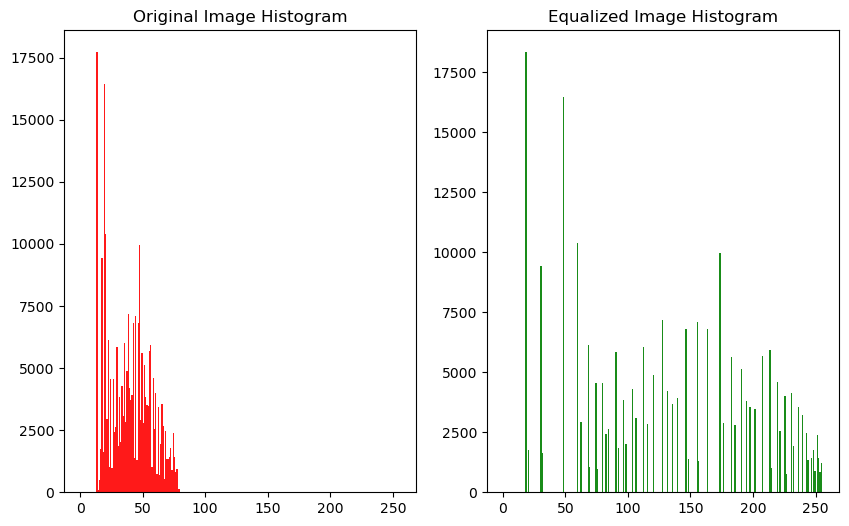

In [31]:
img_eq = hist_eq(img5)

img_eq_hist = img_eq.ravel()
img5_hist = img5.ravel()

fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].hist(img5_hist, bins=256, range=(0, 256), alpha=0.9, color='red')
ax[0].set_title("Original Image Histogram")
ax[1].hist(img_eq_hist, bins=256, range=(0, 256), alpha=0.9, color='green')
ax[1].set_title("Equalized Image Histogram")

plt.show()


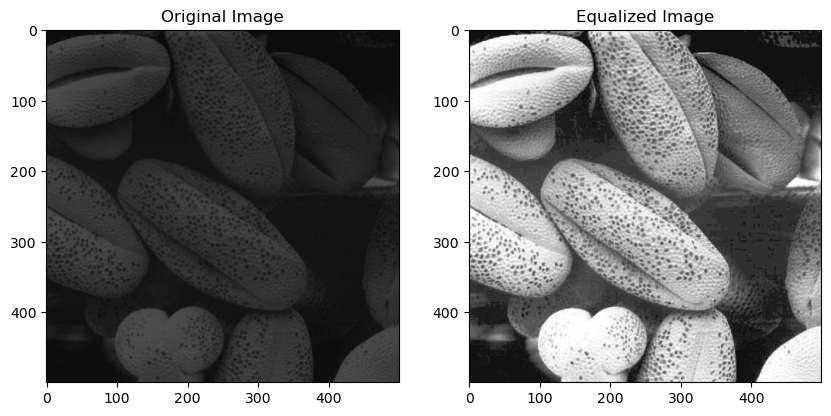

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].imshow(img5, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Equalized Image")

plt.show()